Затухающие колебания
===

В общем виде затухающие колебания описываются следующим однородным дифферинциальным уравнением второго порядка (по II закону Ньютона):

$$m\ddot x = -(kx + r\dot x)\text{,}$$

где $F_x = -kx$ - квазиупругая сила; $(F_{тр})_x = -r\dot x$ - сила сопротивления среды. Разделив обе части уравнения на $m$ - массу колебающейся системы и переобозначив $\beta = \frac{r}{2m}$ - коэффициент затухания и $\omega_0 = \sqrt{\frac{k}{m}}$ - собственная частота колебающейся системы, получаем:

$$\tag{1} \ddot x + 2\beta\dot x + \omega_0^2x = 0$$

Общее решение уравнения $(1)$ будем искать в виде $x(t) = e^{\lambda t}$. Решим характеристическое уравнение для уравнения $(1)$:

$$\lambda^2 + 2\beta\lambda + \omega_0^2 = 0$$

$$\tag{2}\lambda_{1,2} = -\beta \pm i\sqrt{\omega_0^2 - \beta^2}$$

Возможны два случая:
1) $\omega_0 > \beta$ - затухающие колебания;
2) $\omega_0 \le \beta$ - апериодическое движение.

### Случай $\omega_0 > \beta$

Подставив решения $(2)$ в уравнение $(1)$ получаем

$$x(t) = C_1e^{(-\beta + i\sqrt{\omega_0^2 - \beta^2})t} + C_2e^{(-\beta - i\sqrt{\omega_0^2 - \beta^2})t}$$

Взяв $\omega' = \sqrt{\omega_0^2 - \beta^2}$, $C_1 = \frac{a_0}{2}e^{i\alpha} \in \mathbb{R}$ и $C_2 = \frac{a_0}{2}e^{-i\alpha} \in \mathbb{R}$, окончательно получаем

$$\tag{3} x(t) = a_0e^{-\beta t}\cos(\omega't + \alpha)$$

Построим график затухающих колебаний:

In [8]:
start_amplitude = 10
damping_coefficient = 0.5
self_frequency = 5
start_phase = 0

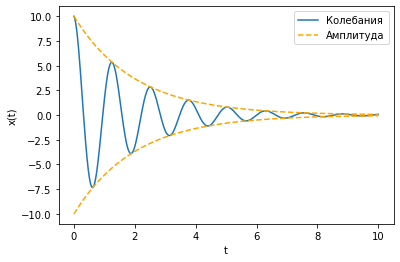

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

@np.vectorize
def damping_amplitude(t):
    return start_amplitude*math.exp(-damping_coefficient*t)

@np.vectorize
def damped_oscillations(t):
    return damping_amplitude(t)*math.cos(math.sqrt(self_frequency*self_frequency - damping_coefficient*damping_coefficient)*t + start_phase)

xs = np.linspace(0, 10, 1000)
oscillations_ys = damped_oscillations(xs)
amplitude_ys = damping_amplitude(xs)
negative_amplitude_ys = np.array([-i for i in amplitude_ys])

plt.plot(xs, oscillations_ys, label='Колебания')
plt.plot(xs, amplitude_ys, color='orange', label='Амплитуда', linestyle='--')
plt.plot(xs, negative_amplitude_ys, color='orange', linestyle='--')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

### Случай $\omega_0 \le \beta$

В этом случае получаем $\lambda_1, \lambda_2 \in \mathbb{R}$ и уравнение $(1)$ принимает вид

$$x(t) = C_1e^{-\vert\lambda_1\vert t} + C_2e^{-\vert\lambda_2\vert t}$$

Возможны два случая:
1) $\vert\vec{\upsilon_0}\vert \le \vert x_0\vert(\beta + \sqrt{\beta^2 - \omega_0^2})$ - случай (\*);
2) $\vert\vec{\upsilon_0}\vert > \vert x_0\vert(\beta + \sqrt{\beta^2 - \omega_0^2})$ - случай (\*\*),

где $\vec{\upsilon_0}$ - начальная скорость, а $x_0$ - начальная координата

Построим график апериодического движения:

In [38]:
c11 = 1
c12 = 5
c21 = 10
c22 = -6
l1 = 20
l2 = 1

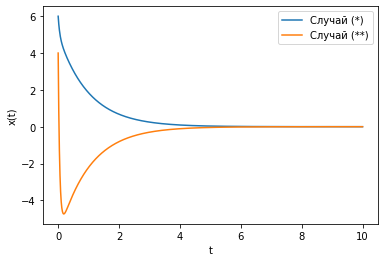

In [39]:
@np.vectorize
def aperiodic_motion_1(t):
    return c11*math.exp(-l1*t) + c12*math.exp(-l2*t)

@np.vectorize
def aperiodic_motion_2(t):
    return c21*math.exp(-l1*t) + c22*math.exp(-l2*t)

xs = np.linspace(0, 10, 1000)
ys_1 = aperiodic_motion_1(xs)
ys_2 = aperiodic_motion_2(xs)

plt.plot(xs, ys_1, label='Случай (*)')
plt.plot(xs, ys_2, label='Случай (**)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()